In [1]:
# Install boto3 to access S3 and yt-dlp for Downloading YouTube videos
!pip install boto3 yt-dlp

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 135 kB 3.9 MB/s            
     |████████████████████████████████| 3.1 MB 6.3 MB/s            
     |████████████████████████████████| 79 kB 14.2 MB/s            
     |████████████████████████████████| 11.2 MB 47.4 MB/s            
     |████████████████████████████████| 194 kB 81.2 MB/s            
     |████████████████████████████████| 129 kB 76.3 MB/s            
     |████████████████████████████████| 2.1 MB 78.5 MB/s            
     |████████████████████████████████| 2.8 MB 79.7 MB/s            


In [19]:
!pip install s3fs

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.1 MB 6.0 MB/s            
     |████████████████████████████████| 73 kB 3.7 MB/s             
     |████████████████████████████████| 173 kB 76.7 MB/s            
     |████████████████████████████████| 11.1 MB 77.6 MB/s            
     |████████████████████████████████| 78 kB 10.8 MB/s            
     |████████████████████████████████| 269 kB 78.4 MB/s            
     |████████████████████████████████| 228 kB 76.0 MB/s            
     |████████████████████████████████| 114 kB 80.4 MB/s            
  Attempting uninstall: botocore
    Found existing installation: botocore 1.31.62
    Uninstalling botocore-1.31.62:
      Successfully uninstalled botocore-1.31.62
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.28.62 requires botocore

In [1]:
# Import required libraries
import boto3
import yt_dlp
import random
import os

In [2]:
import configparser

config = configparser.ConfigParser()
config.read('/home/ec2-user/.aws/credentials')

['/home/ec2-user/.aws/credentials']

In [14]:
# AWS credentials and S3 settings
aws_access_key_id = config["root"]['aws_access_key_id']
aws_secret_access_key = config["root"]['aws_secret_access_key']
bucket_name = 'asl-capstone'
prefix = 'youtube-asl/test_sample/'
save_path = '/content/temp_folder'
s3_URI = 's3://asl-capstone/'

In [6]:
# Initialize a Boto3 S3 client
s3 = boto3.client(
    's3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name='us-west-2'
)

In [8]:
import s3fs
fs = s3fs.S3FileSystem(anon=True)

In [9]:
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)

if 'Contents' in response:
    for obj in response['Contents']:
        print('Object Key:', obj['Key'])
else:
    print('No objects found in the bucket.')

s3.close()


Object Key: youtube-asl/test_sample/
Object Key: youtube-asl/test_sample/06kKvQp4SfM.en-0hllRZe4s5s.parquet
Object Key: youtube-asl/test_sample/06kKvQp4SfM.webm
Object Key: youtube-asl/test_sample/0XGfpv6PUq4.en.parquet
Object Key: youtube-asl/test_sample/0XGfpv6PUq4.mkv
Object Key: youtube-asl/test_sample/5J8a2CaXWvk.en.parquet
Object Key: youtube-asl/test_sample/5J8a2CaXWvk.webm
Object Key: youtube-asl/test_sample/8VTAvocbMpI.en.parquet
Object Key: youtube-asl/test_sample/8VTAvocbMpI.mkv
Object Key: youtube-asl/test_sample/Dmvi3_q3gMc.en-CA.parquet
Object Key: youtube-asl/test_sample/Dmvi3_q3gMc.mkv
Object Key: youtube-asl/test_sample/UEryLHbfb0M.en-eEY6OEpapPo.parquet
Object Key: youtube-asl/test_sample/UEryLHbfb0M.webm
Object Key: youtube-asl/test_sample/aoLQ0VchSec.en.parquet
Object Key: youtube-asl/test_sample/aoLQ0VchSec.mkv
Object Key: youtube-asl/test_sample/dzWgVm2oY44.en.parquet
Object Key: youtube-asl/test_sample/dzWgVm2oY44.webm
Object Key: youtube-asl/test_sample/esx9dGfU

In [15]:
import pandas as pd
import re

# Define the file path to the Parquet file
parquet_file_path = s3_URI + 'youtube-asl/test_sample/06kKvQp4SfM.en-0hllRZe4s5s.parquet'

# Load the Parquet file into a DataFrame
df = pd.read_parquet(parquet_file_path)

# Display the DataFrame
df

,File Name,Start Timestamp,End Timestamp,Caption,frame_rate,start_time_seconds,end_time_seconds,start_frame,end_frame,start_frame_float,end_frame_float
0,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:00.000,00:00:02.236,Welcome to the third round,30.0,0.000,2.236,0.0,67.0,0.00,67.08
1,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:02.236,00:00:04.304,of the Pearls announcement.,30.0,2.236,4.304,67.0,129.0,67.08,129.12
2,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:04.304,00:00:07.207,Today's category is called the,30.0,4.304,7.207,129.0,216.0,129.12,216.21
3,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:07.207,00:00:09.610,Hidden Pearls. What is it?,30.0,7.207,9.610,216.0,288.0,216.21,288.30
4,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:09.610,00:00:12.379,"Hidden Pearls...in other words,",30.0,9.610,12.379,288.0,371.0,288.30,371.37
5,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:12.379,00:00:14.781,they are known as the dark horses.,30.0,12.379,14.781,371.0,443.0,371.37,443.43
6,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:14.781,00:00:16.984,"Every now and then, they are seldom recognized",30.0,14.781,16.984,443.0,510.0,443.43,509.52
7,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:16.984,00:00:19.286,for their work or performance.,30.0,16.984,19.286,510.0,579.0,509.52,578.58
8,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:19.286,00:00:22.289,"Additionally, they are behind a big leader",30.0,19.286,22.289,579.0,669.0,578.58,668.67
9,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:22.289,00:00:25.359,"If not for them, the big leader wouldn't be here.",30.0,22.289,25.359,669.0,761.0,668.67,760.77


In [18]:
df.to_parquet(s3_URI + 'youtube-asl/1000-samples/cleaned_parquet/test.parquet')

In [ ]:
#Count unique file names
unique_file_names = df['File Name'].nunique()

print("Number of unique File Names:", unique_file_names)



Number of unique File Names: 69


In [ ]:
# Clean Caption
def clean_caption(caption):
    # Convert all characters to lowercase
    caption = caption.lower()
    # Replace special characters with a space
    caption = re.sub(r'[^\w\s]', ' ', caption)
    # Remove ' t ' and replace with a space
    caption = caption.replace(' t ', ' ')
    # Remove 'll' and 's'
    caption = caption.replace(' ll ', ' ').replace(' s ', ' ')
    # Remove 'm' and 'u'
    caption = caption.replace(' m ', ' ').replace(' u ', ' ')
    # Replace double spaces with a single space
    caption = re.sub(r'\s+', ' ', caption)
    # Remove leading and trailing spaces
    return caption.strip()

# Apply the clean_caption function to each row in the 'Caption' column in a new column
df['Cleaned Caption'] = df['Caption'].apply(clean_caption)

# Display the DataFrame with the cleaned captions
df

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption
0,C1N-4uK-awc.en.vtt,00:00:03.489,00:00:07.589,A cartesian plane contains an X-axis and a Y-a...,a cartesian plane contains an x axis and a y axis
1,C1N-4uK-awc.en.vtt,00:00:07.589,00:00:13.823,The x-axis is horizontal. The y-axis is verti...,the x axis is horizontal the y axis is vertical
2,C1N-4uK-awc.en.vtt,00:00:13.823,00:00:19.201,You'll notice this divides the graph into four...,you notice this divides the graph into four qu...
3,C1N-4uK-awc.en.vtt,00:00:19.201,00:00:27.191,"In quadrant 1, both x and y have positive values.",in quadrant 1 both x and y have positive values
4,C1N-4uK-awc.en.vtt,00:00:27.191,00:00:37.510,"In quadrant two, x has a negative value and y ...",in quadrant two x has a negative value and y h...
...,...,...,...,...,...
3285,-xg8MDaGgyc.ase.vtt,00:01:55.191,00:01:58.666,"After the ninth plague, Pharaoh remained stubb...",after the ninth plague pharaoh remained stubbo...
3286,-xg8MDaGgyc.ase.vtt,00:01:58.825,00:02:00.825,The tenth plague was the death of the firstbor...,the tenth plague was the death of the firstbor...
3287,-xg8MDaGgyc.ase.vtt,00:02:01.329,00:02:08.149,"Before the tenth plague went into effect, Mose...",before the tenth plague went into effect moses...
3288,-xg8MDaGgyc.ase.vtt,00:02:08.420,00:02:14.735,So that the Angel of Death would recognize lam...,so that the angel of death would recognize lam...


In [ ]:
# count unique words in a sentence
def count_unique_words(sentence):
    words = sentence.split()
    unique_words = set(words)
    return len(unique_words)

# Apply the function to each row in the 'Caption' column and store the results in a new column
df['Unique_Words_Count'] = df['Cleaned Caption'].apply(count_unique_words)

# Extract unique words from the 'clean_count' column of 'df'
unique_words_df = set(' '.join(df['Cleaned Caption']).split())
print("Total number of unique words in the 'Caption' column:", len(unique_words_df))



Total number of unique words in the 'Caption' column: 4577


In [ ]:
# Count the number of words in the 'Cleaned Caption' column and add it as a new column
df['Caption Length'] = df['Cleaned Caption'].apply(lambda x: len(x.split()))

df

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length
0,C1N-4uK-awc.en.vtt,00:00:03.489,00:00:07.589,A cartesian plane contains an X-axis and a Y-a...,a cartesian plane contains an x axis and a y axis,9,11
1,C1N-4uK-awc.en.vtt,00:00:07.589,00:00:13.823,The x-axis is horizontal. The y-axis is verti...,the x axis is horizontal the y axis is vertical,7,10
2,C1N-4uK-awc.en.vtt,00:00:13.823,00:00:19.201,You'll notice this divides the graph into four...,you notice this divides the graph into four qu...,9,9
3,C1N-4uK-awc.en.vtt,00:00:19.201,00:00:27.191,"In quadrant 1, both x and y have positive values.",in quadrant 1 both x and y have positive values,10,10
4,C1N-4uK-awc.en.vtt,00:00:27.191,00:00:37.510,"In quadrant two, x has a negative value and y ...",in quadrant two x has a negative value and y h...,11,14
...,...,...,...,...,...,...,...
3285,-xg8MDaGgyc.ase.vtt,00:01:55.191,00:01:58.666,"After the ninth plague, Pharaoh remained stubb...",after the ninth plague pharaoh remained stubbo...,13,16
3286,-xg8MDaGgyc.ase.vtt,00:01:58.825,00:02:00.825,The tenth plague was the death of the firstbor...,the tenth plague was the death of the firstbor...,10,13
3287,-xg8MDaGgyc.ase.vtt,00:02:01.329,00:02:08.149,"Before the tenth plague went into effect, Mose...",before the tenth plague went into effect moses...,19,19
3288,-xg8MDaGgyc.ase.vtt,00:02:08.420,00:02:14.735,So that the Angel of Death would recognize lam...,so that the angel of death would recognize lam...,19,19


In [ ]:
# Calculate the average sentence length
average_sentence_length = df['Caption Length'].mean()

print("Average Caption Length:", average_sentence_length, 'Words')

Average Caption Length: 8.590577507598784 Words


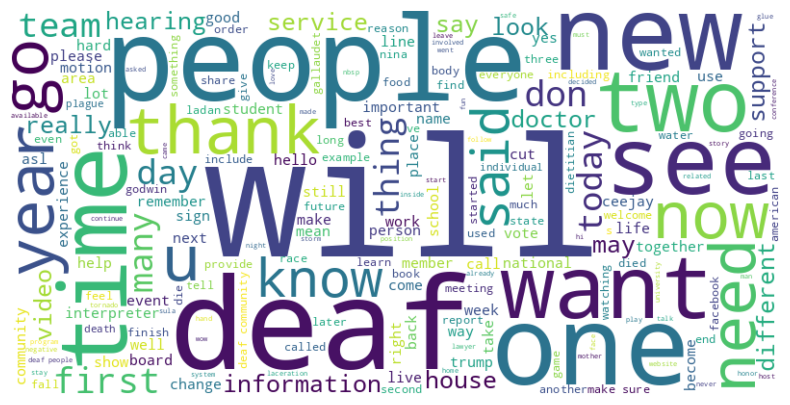

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all cleaned captions into a single string
all_cleaned_captions = ' '.join(df['Cleaned Caption'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_captions)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Convert to datetime objects
df['Start Timestamp_dt'] = pd.to_datetime(df['Start Timestamp'])
df['End Timestamp_dt'] = pd.to_datetime(df['End Timestamp'])

df['Clip Duration'] = (df['End Timestamp_dt'] - df['Start Timestamp_dt']).dt.total_seconds()

df

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration
0,C1N-4uK-awc.en.vtt,00:00:03.489,00:00:07.589,A cartesian plane contains an X-axis and a Y-a...,a cartesian plane contains an x axis and a y axis,9,11,2023-10-01 00:00:03.489,2023-10-01 00:00:07.589,4.100
1,C1N-4uK-awc.en.vtt,00:00:07.589,00:00:13.823,The x-axis is horizontal. The y-axis is verti...,the x axis is horizontal the y axis is vertical,7,10,2023-10-01 00:00:07.589,2023-10-01 00:00:13.823,6.234
2,C1N-4uK-awc.en.vtt,00:00:13.823,00:00:19.201,You'll notice this divides the graph into four...,you notice this divides the graph into four qu...,9,9,2023-10-01 00:00:13.823,2023-10-01 00:00:19.201,5.378
3,C1N-4uK-awc.en.vtt,00:00:19.201,00:00:27.191,"In quadrant 1, both x and y have positive values.",in quadrant 1 both x and y have positive values,10,10,2023-10-01 00:00:19.201,2023-10-01 00:00:27.191,7.990
4,C1N-4uK-awc.en.vtt,00:00:27.191,00:00:37.510,"In quadrant two, x has a negative value and y ...",in quadrant two x has a negative value and y h...,11,14,2023-10-01 00:00:27.191,2023-10-01 00:00:37.510,10.319
...,...,...,...,...,...,...,...,...,...,...
3285,-xg8MDaGgyc.ase.vtt,00:01:55.191,00:01:58.666,"After the ninth plague, Pharaoh remained stubb...",after the ninth plague pharaoh remained stubbo...,13,16,2023-10-01 00:01:55.191,2023-10-01 00:01:58.666,3.475
3286,-xg8MDaGgyc.ase.vtt,00:01:58.825,00:02:00.825,The tenth plague was the death of the firstbor...,the tenth plague was the death of the firstbor...,10,13,2023-10-01 00:01:58.825,2023-10-01 00:02:00.825,2.000
3287,-xg8MDaGgyc.ase.vtt,00:02:01.329,00:02:08.149,"Before the tenth plague went into effect, Mose...",before the tenth plague went into effect moses...,19,19,2023-10-01 00:02:01.329,2023-10-01 00:02:08.149,6.820
3288,-xg8MDaGgyc.ase.vtt,00:02:08.420,00:02:14.735,So that the Angel of Death would recognize lam...,so that the angel of death would recognize lam...,19,19,2023-10-01 00:02:08.420,2023-10-01 00:02:14.735,6.315


In [ ]:
# Calculate the average clip duration
average_clip_duration = df['Clip Duration'].mean()

print("Average Clip Duration:", average_clip_duration, 'seconds')


Average Clip Duration: 4.64678753799392 seconds


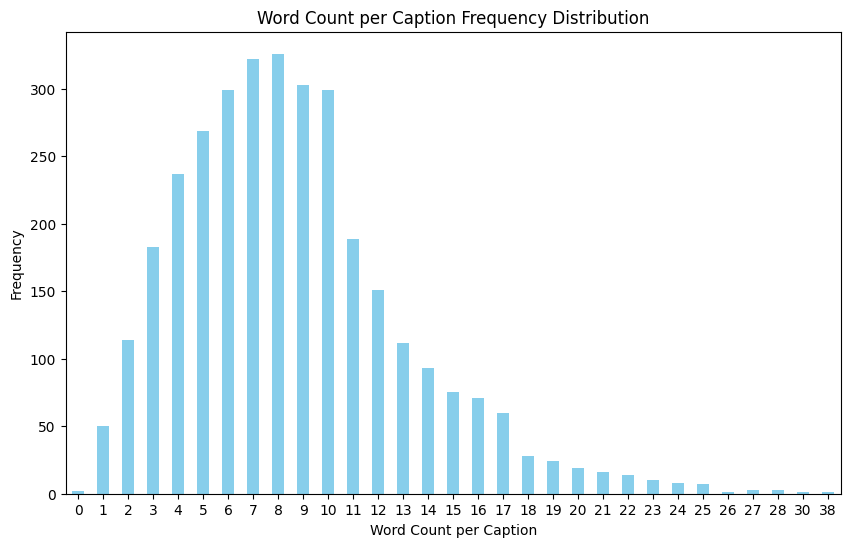

In [ ]:
# Create a frequency distribution of the 'Caption Length' column
caption_length_distribution = df['Caption Length'].value_counts()

# Sort index
caption_length_distribution = caption_length_distribution.sort_index()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
caption_length_distribution.plot(kind='bar', color='skyblue')
plt.title('Word Count per Caption Frequency Distribution')
plt.xlabel('Word Count per Caption')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

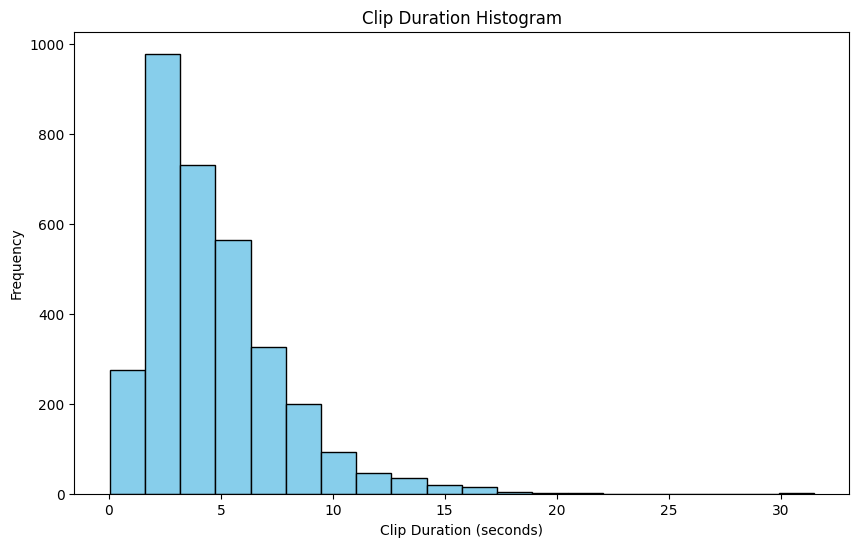

In [ ]:
# Create a histogram for the 'Clip Duration' column
plt.figure(figsize=(10, 6))
plt.hist(df['Clip Duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Clip Duration Histogram')
plt.xlabel('Clip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Words per second'] = df['Caption Length'] / df['Clip Duration']
df

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second
0,C1N-4uK-awc.en.vtt,00:00:03.489,00:00:07.589,A cartesian plane contains an X-axis and a Y-a...,a cartesian plane contains an x axis and a y axis,9,11,2023-10-01 00:00:03.489,2023-10-01 00:00:07.589,4.100,2.682927
1,C1N-4uK-awc.en.vtt,00:00:07.589,00:00:13.823,The x-axis is horizontal. The y-axis is verti...,the x axis is horizontal the y axis is vertical,7,10,2023-10-01 00:00:07.589,2023-10-01 00:00:13.823,6.234,1.604107
2,C1N-4uK-awc.en.vtt,00:00:13.823,00:00:19.201,You'll notice this divides the graph into four...,you notice this divides the graph into four qu...,9,9,2023-10-01 00:00:13.823,2023-10-01 00:00:19.201,5.378,1.673485
3,C1N-4uK-awc.en.vtt,00:00:19.201,00:00:27.191,"In quadrant 1, both x and y have positive values.",in quadrant 1 both x and y have positive values,10,10,2023-10-01 00:00:19.201,2023-10-01 00:00:27.191,7.990,1.251564
4,C1N-4uK-awc.en.vtt,00:00:27.191,00:00:37.510,"In quadrant two, x has a negative value and y ...",in quadrant two x has a negative value and y h...,11,14,2023-10-01 00:00:27.191,2023-10-01 00:00:37.510,10.319,1.356721
...,...,...,...,...,...,...,...,...,...,...,...
3285,-xg8MDaGgyc.ase.vtt,00:01:55.191,00:01:58.666,"After the ninth plague, Pharaoh remained stubb...",after the ninth plague pharaoh remained stubbo...,13,16,2023-10-01 00:01:55.191,2023-10-01 00:01:58.666,3.475,4.604317
3286,-xg8MDaGgyc.ase.vtt,00:01:58.825,00:02:00.825,The tenth plague was the death of the firstbor...,the tenth plague was the death of the firstbor...,10,13,2023-10-01 00:01:58.825,2023-10-01 00:02:00.825,2.000,6.500000
3287,-xg8MDaGgyc.ase.vtt,00:02:01.329,00:02:08.149,"Before the tenth plague went into effect, Mose...",before the tenth plague went into effect moses...,19,19,2023-10-01 00:02:01.329,2023-10-01 00:02:08.149,6.820,2.785924
3288,-xg8MDaGgyc.ase.vtt,00:02:08.420,00:02:14.735,So that the Angel of Death would recognize lam...,so that the angel of death would recognize lam...,19,19,2023-10-01 00:02:08.420,2023-10-01 00:02:14.735,6.315,3.008709


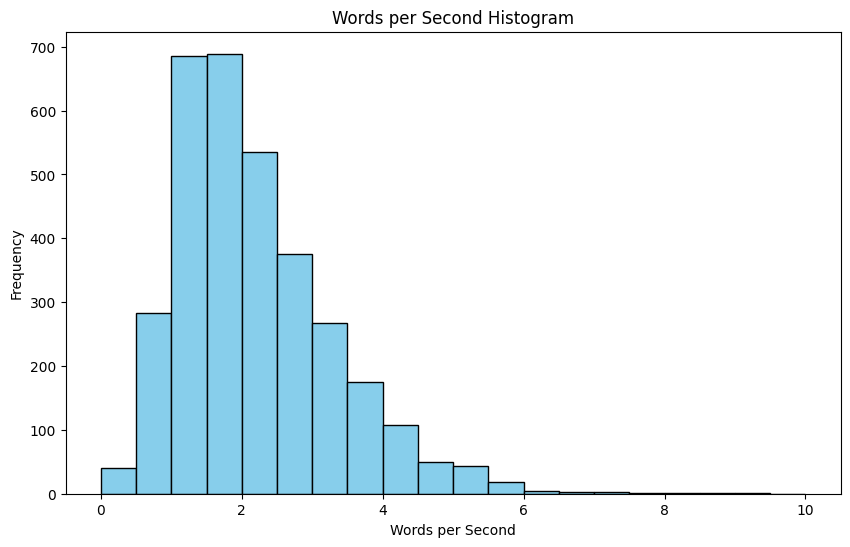

Standard Deviation of Words per Second: 3.8353508349610994
Variance of Words per Second: 14.709916027236803


In [ ]:
# Create a histogram for the 'Words per second' column
plt.figure(figsize=(10, 6))
plt.hist(df['Words per second'], bins=20, range=(0, 10), color='skyblue', edgecolor='black')
plt.title('Words per Second Histogram')
plt.xlabel('Words per Second')
plt.ylabel('Frequency')
plt.show()

# Print the standard deviation and variance of the 'Words per second' column
std_deviation = df['Words per second'].std()
variance = df['Words per second'].var()

print(f'Standard Deviation of Words per Second: {std_deviation}')
print(f'Variance of Words per Second: {variance}')

In [ ]:
# Full sentence checker
def full_sentence(caption):
    #check if the caption matches the pattern
    pattern = r'^[A-Z].*\.$'
    return bool(re.match(pattern, caption))

# Apply the function to each row in the 'Caption' column and add the result as a new column
df['Full Sentence'] = df['Caption'].apply(full_sentence)

df

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence
0,C1N-4uK-awc.en.vtt,00:00:03.489,00:00:07.589,A cartesian plane contains an X-axis and a Y-a...,a cartesian plane contains an x axis and a y axis,9,11,2023-10-01 00:00:03.489,2023-10-01 00:00:07.589,4.100,2.682927,True
1,C1N-4uK-awc.en.vtt,00:00:07.589,00:00:13.823,The x-axis is horizontal. The y-axis is verti...,the x axis is horizontal the y axis is vertical,7,10,2023-10-01 00:00:07.589,2023-10-01 00:00:13.823,6.234,1.604107,True
2,C1N-4uK-awc.en.vtt,00:00:13.823,00:00:19.201,You'll notice this divides the graph into four...,you notice this divides the graph into four qu...,9,9,2023-10-01 00:00:13.823,2023-10-01 00:00:19.201,5.378,1.673485,True
3,C1N-4uK-awc.en.vtt,00:00:19.201,00:00:27.191,"In quadrant 1, both x and y have positive values.",in quadrant 1 both x and y have positive values,10,10,2023-10-01 00:00:19.201,2023-10-01 00:00:27.191,7.990,1.251564,True
4,C1N-4uK-awc.en.vtt,00:00:27.191,00:00:37.510,"In quadrant two, x has a negative value and y ...",in quadrant two x has a negative value and y h...,11,14,2023-10-01 00:00:27.191,2023-10-01 00:00:37.510,10.319,1.356721,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3285,-xg8MDaGgyc.ase.vtt,00:01:55.191,00:01:58.666,"After the ninth plague, Pharaoh remained stubb...",after the ninth plague pharaoh remained stubbo...,13,16,2023-10-01 00:01:55.191,2023-10-01 00:01:58.666,3.475,4.604317,True
3286,-xg8MDaGgyc.ase.vtt,00:01:58.825,00:02:00.825,The tenth plague was the death of the firstbor...,the tenth plague was the death of the firstbor...,10,13,2023-10-01 00:01:58.825,2023-10-01 00:02:00.825,2.000,6.500000,True
3287,-xg8MDaGgyc.ase.vtt,00:02:01.329,00:02:08.149,"Before the tenth plague went into effect, Mose...",before the tenth plague went into effect moses...,19,19,2023-10-01 00:02:01.329,2023-10-01 00:02:08.149,6.820,2.785924,True
3288,-xg8MDaGgyc.ase.vtt,00:02:08.420,00:02:14.735,So that the Angel of Death would recognize lam...,so that the angel of death would recognize lam...,19,19,2023-10-01 00:02:08.420,2023-10-01 00:02:14.735,6.315,3.008709,True


In [ ]:
# Add a new column 'Period Count' to count the number of periods in each caption
df['Period Count'] = df['Caption'].str.count('\.')

df

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
0,C1N-4uK-awc.en.vtt,00:00:03.489,00:00:07.589,A cartesian plane contains an X-axis and a Y-a...,a cartesian plane contains an x axis and a y axis,9,11,2023-10-01 00:00:03.489,2023-10-01 00:00:07.589,4.100,2.682927,True,1
1,C1N-4uK-awc.en.vtt,00:00:07.589,00:00:13.823,The x-axis is horizontal. The y-axis is verti...,the x axis is horizontal the y axis is vertical,7,10,2023-10-01 00:00:07.589,2023-10-01 00:00:13.823,6.234,1.604107,True,2
2,C1N-4uK-awc.en.vtt,00:00:13.823,00:00:19.201,You'll notice this divides the graph into four...,you notice this divides the graph into four qu...,9,9,2023-10-01 00:00:13.823,2023-10-01 00:00:19.201,5.378,1.673485,True,1
3,C1N-4uK-awc.en.vtt,00:00:19.201,00:00:27.191,"In quadrant 1, both x and y have positive values.",in quadrant 1 both x and y have positive values,10,10,2023-10-01 00:00:19.201,2023-10-01 00:00:27.191,7.990,1.251564,True,1
4,C1N-4uK-awc.en.vtt,00:00:27.191,00:00:37.510,"In quadrant two, x has a negative value and y ...",in quadrant two x has a negative value and y h...,11,14,2023-10-01 00:00:27.191,2023-10-01 00:00:37.510,10.319,1.356721,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,-xg8MDaGgyc.ase.vtt,00:01:55.191,00:01:58.666,"After the ninth plague, Pharaoh remained stubb...",after the ninth plague pharaoh remained stubbo...,13,16,2023-10-01 00:01:55.191,2023-10-01 00:01:58.666,3.475,4.604317,True,1
3286,-xg8MDaGgyc.ase.vtt,00:01:58.825,00:02:00.825,The tenth plague was the death of the firstbor...,the tenth plague was the death of the firstbor...,10,13,2023-10-01 00:01:58.825,2023-10-01 00:02:00.825,2.000,6.500000,True,1
3287,-xg8MDaGgyc.ase.vtt,00:02:01.329,00:02:08.149,"Before the tenth plague went into effect, Mose...",before the tenth plague went into effect moses...,19,19,2023-10-01 00:02:01.329,2023-10-01 00:02:08.149,6.820,2.785924,True,1
3288,-xg8MDaGgyc.ase.vtt,00:02:08.420,00:02:14.735,So that the Angel of Death would recognize lam...,so that the angel of death would recognize lam...,19,19,2023-10-01 00:02:08.420,2023-10-01 00:02:14.735,6.315,3.008709,True,1


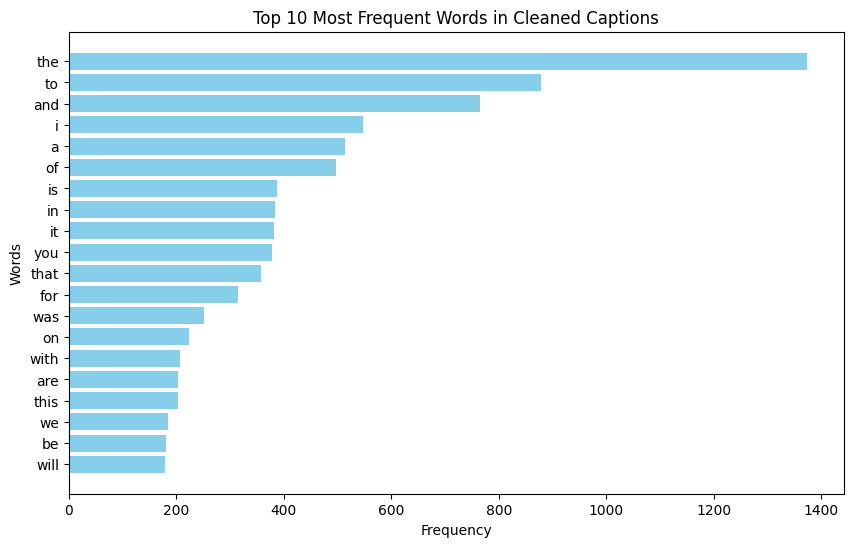

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Combine all 'Cleaned Caption' values into a single string
all_cleaned_caption = ' '.join(df['Cleaned Caption'])

# Split the combined text into words
words = all_cleaned_caption.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most frequent words
top_10_words = word_counts.most_common(20)

# Extract words and their counts from the top 10 list
top_words, counts = zip(*top_10_words)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words in Cleaned Captions')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

In [ ]:
# Calculate the sum of 'Caption Length' column
sum_caption_length = df['Caption Length'].sum()

# Calculate the ratio
ratio_caption_length_to_unique_words = sum_caption_length / len(unique_words_df)

# Print the result
print("Sum of Caption Length / Sum of Unique Words Count Ratio:", ratio_caption_length_to_unique_words)

Sum of Caption Length / Sum of Unique Words Count Ratio: 6.175005462093074


In [ ]:
df.describe()

,Unique_Words_Count,Caption Length,Clip Duration,Words per second,Period Count
count,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000
mean,8.220365,8.590578,4.646788,2.240710,0.628875
std,4.089276,4.509492,2.935036,3.835351,0.678438
min,0.000000,0.000000,0.033000,0.000000,0.000000
25%,5.000000,5.000000,2.460000,1.370999,0.000000
50%,8.000000,8.000000,4.000000,1.937672,1.000000
75%,10.000000,11.000000,6.075750,2.777778,1.000000
max,33.000000,38.000000,31.500000,212.121212,7.000000


In [ ]:
### NUMBER OF False WITH PERIODS
# Filter the DataFrame
filtered_df = df[(df['Full Sentence'] == False) & (df['Period Count'] > 0)]

filtered_df

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
33,JvFeQBjtv7Y.en.vtt,00:00:26.486,00:00:31.361,in the grave yard down the street.,in the grave yard down the street,6,7,2023-10-01 00:00:26.486,2023-10-01 00:00:31.361,4.875,1.435897,False,1
36,JvFeQBjtv7Y.en.vtt,00:00:49.979,00:00:56.916,they said she was too afraid to go to the grave.,they said she was too afraid to go to the grave,10,11,2023-10-01 00:00:49.979,2023-10-01 00:00:56.916,6.937,1.585700,False,1
40,JvFeQBjtv7Y.en.vtt,00:01:22.134,00:01:28.014,so the other girls knew she went.,so the other girls knew she went,7,7,2023-10-01 00:01:22.134,2023-10-01 00:01:28.014,5.880,1.190476,False,1
51,3j50-GpcSYU.en-XAW5jg95QeE.vtt,00:00:18.986,00:00:21.986,the exhibition of King Tut from Egypt.,the exhibition of king tut from egypt,7,7,2023-10-01 00:00:18.986,2023-10-01 00:00:21.986,3.000,2.333333,False,1
58,3j50-GpcSYU.en-XAW5jg95QeE.vtt,00:01:04.204,00:01:10.644,through mummification.,through mummification,2,2,2023-10-01 00:01:04.204,2023-10-01 00:01:10.644,6.440,0.310559,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:38.305,00:00:41.975,"and in addition, writes for other parenting we...",and in addition writes for other parenting web...,8,8,2023-10-01 00:00:38.305,2023-10-01 00:00:41.975,3.670,2.179837,False,1
3252,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:43.911,00:00:47.211,Melissa Rich. She fought against,melissa rich she fought against,5,5,2023-10-01 00:00:43.911,2023-10-01 00:00:47.211,3.300,1.515152,False,1
3254,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:00:50.651,00:00:52.953,"and hard of hearing people. Plus, she ensured",and hard of hearing people plus she ensured,8,8,2023-10-01 00:00:50.651,2023-10-01 00:00:52.953,2.302,3.475239,False,1
3260,06kKvQp4SfM.en-0hllRZe4s5s.vtt,00:01:08.769,00:01:11.570,"program. She works closely with her mother, Tami,",program she works closely with her mother tami,8,8,2023-10-01 00:01:08.769,2023-10-01 00:01:11.570,2.801,2.856123,False,1


In [ ]:
### NUMBER OF False WITH PERIODS
# Filter the DataFrame
filtered_df = df[(df['Full Sentence'] == False) & (df['Period Count'] > 1)]

filtered_df

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
238,YzJtO09AGeY.en.vtt,00:03:05.840,00:03:16.220,hhs.texas.gov/deaf-hard-hearing,hhs texas gov deaf hard hearing,6,6,2023-10-01 00:03:05.840,2023-10-01 00:03:16.220,10.380,0.578035,False,2
348,MeXD-8q_HnE.en-US.vtt,00:06:23.296,00:06:25.366,"You may be tempted to peel\nit off, but don't ...",you may be tempted to peel it off but don bother,11,11,2023-10-01 00:06:23.296,2023-10-01 00:06:25.366,2.070,5.314010,False,3
518,kE7Yyrg9GT4.en.vtt,00:00:02.920,00:00:11.120,"We are soon approaching Monday, October 9, 2 t...",we are soon approaching monday october 9 2 to ...,18,18,2023-10-01 00:00:02.920,2023-10-01 00:00:11.120,8.200,2.195122,False,2
607,QC7Jkyt6-gM.en.vtt,00:02:40.300,00:02:47.960,"how many are present, how many certified,\nhow...",how many are present how many certified how ma...,7,11,2023-10-01 00:02:40.300,2023-10-01 00:02:47.960,7.660,1.436031,False,2
619,QC7Jkyt6-gM.en.vtt,00:04:10.189,00:04:14.469,2. Committee (national)\n3. Task Force (national),2 committee national 3 task force national,6,7,2023-10-01 00:04:10.189,2023-10-01 00:04:14.469,4.280,1.635514,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,4vfuSkczIcI.en.vtt,00:01:39.933,00:01:43.303,The explosion went off.\nIt happened.,the explosion went off it happened,6,6,2023-10-01 00:01:39.933,2023-10-01 00:01:43.303,3.370,1.780415,False,2
3147,4vfuSkczIcI.en.vtt,00:03:20.133,00:03:25.138,First time. I experienced\nthis in the 1975 war.,first time i experienced this in the 1975 war,9,9,2023-10-01 00:03:20.133,2023-10-01 00:03:25.138,5.005,1.798202,False,2
3151,4vfuSkczIcI.en.vtt,00:03:29.743,00:03:32.846,You could feel the blast.\nYou thought of your...,you could feel the blast you thought of your f...,9,10,2023-10-01 00:03:29.743,2023-10-01 00:03:32.846,3.103,3.222688,False,2
3230,dKytQm9bqYU.en.vtt,00:00:36.480,00:00:38.370,signvote.org.,signvote org,2,2,2023-10-01 00:00:36.480,2023-10-01 00:00:38.370,1.890,1.058201,False,2


**Data Cleaning Process**


In [ ]:
# List of columns to count zeroes in
columns_to_count_zeroes = ['Unique_Words_Count', 'Caption Length', 'Clip Duration', 'Words per second', 'Period Count']

# Count zeroes in each column
zero_counts = df[columns_to_count_zeroes].apply(lambda x: (x == 0).sum())

# Display the counts
print(zero_counts)

Unique_Words_Count       2
Caption Length           2
Clip Duration            0
Words per second         2
Period Count          1476
dtype: int64


In [ ]:
# Filter the DataFrame to get rows where 'Unique_Words_Count' is 0
rows_with_zero_unique_words = df[df['Unique_Words_Count'] == 0]

rows_with_zero_unique_words

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
1253,6otNBTeQN7M.en.vtt,00:00:00.000,00:00:02.000,,,0,0,2023-10-01 00:00:00.000,2023-10-01 00:00:02.000,2.00,0.0,False,0
1655,5J8a2CaXWvk.en.vtt,00:05:04.860,00:05:06.040,???,,0,0,2023-10-01 00:05:04.860,2023-10-01 00:05:06.040,1.18,0.0,False,0


In [ ]:
# Filter the DataFrame to get rows where 'Caption Length' is 0
rows_with_zero_caption_length = df[df['Caption Length'] == 0]

rows_with_zero_caption_length

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
1253,6otNBTeQN7M.en.vtt,00:00:00.000,00:00:02.000,,,0,0,2023-10-01 00:00:00.000,2023-10-01 00:00:02.000,2.00,0.0,False,0
1655,5J8a2CaXWvk.en.vtt,00:05:04.860,00:05:06.040,???,,0,0,2023-10-01 00:05:04.860,2023-10-01 00:05:06.040,1.18,0.0,False,0


In [ ]:
# Filter the DataFrame to get rows where 'Words per second' is greater than 30
rows_with_words_per_second_gt_20 = df[df['Words per second'] > 20]

rows_with_words_per_second_gt_20

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
485,Qh9ePTctzxo.en.vtt,00:00:00.000,00:00:00.033,"food sources such as fish and shellfish,",food sources such as fish and shellfish,7,7,2023-10-01,2023-10-01 00:00:00.033,0.033,212.121212,False,0


**FULL SENTENCE**

In [ ]:
filtered_df = df[df['Full Sentence'] == True]
filtered_df

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
0,C1N-4uK-awc.en.vtt,00:00:03.489,00:00:07.589,A cartesian plane contains an X-axis and a Y-a...,a cartesian plane contains an x axis and a y axis,9,11,2023-10-01 00:00:03.489,2023-10-01 00:00:07.589,4.100,2.682927,True,1
1,C1N-4uK-awc.en.vtt,00:00:07.589,00:00:13.823,The x-axis is horizontal. The y-axis is verti...,the x axis is horizontal the y axis is vertical,7,10,2023-10-01 00:00:07.589,2023-10-01 00:00:13.823,6.234,1.604107,True,2
2,C1N-4uK-awc.en.vtt,00:00:13.823,00:00:19.201,You'll notice this divides the graph into four...,you notice this divides the graph into four qu...,9,9,2023-10-01 00:00:13.823,2023-10-01 00:00:19.201,5.378,1.673485,True,1
3,C1N-4uK-awc.en.vtt,00:00:19.201,00:00:27.191,"In quadrant 1, both x and y have positive values.",in quadrant 1 both x and y have positive values,10,10,2023-10-01 00:00:19.201,2023-10-01 00:00:27.191,7.990,1.251564,True,1
4,C1N-4uK-awc.en.vtt,00:00:27.191,00:00:37.510,"In quadrant two, x has a negative value and y ...",in quadrant two x has a negative value and y h...,11,14,2023-10-01 00:00:27.191,2023-10-01 00:00:37.510,10.319,1.356721,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,-xg8MDaGgyc.ase.vtt,00:01:55.191,00:01:58.666,"After the ninth plague, Pharaoh remained stubb...",after the ninth plague pharaoh remained stubbo...,13,16,2023-10-01 00:01:55.191,2023-10-01 00:01:58.666,3.475,4.604317,True,1
3286,-xg8MDaGgyc.ase.vtt,00:01:58.825,00:02:00.825,The tenth plague was the death of the firstbor...,the tenth plague was the death of the firstbor...,10,13,2023-10-01 00:01:58.825,2023-10-01 00:02:00.825,2.000,6.500000,True,1
3287,-xg8MDaGgyc.ase.vtt,00:02:01.329,00:02:08.149,"Before the tenth plague went into effect, Mose...",before the tenth plague went into effect moses...,19,19,2023-10-01 00:02:01.329,2023-10-01 00:02:08.149,6.820,2.785924,True,1
3288,-xg8MDaGgyc.ase.vtt,00:02:08.420,00:02:14.735,So that the Angel of Death would recognize lam...,so that the angel of death would recognize lam...,19,19,2023-10-01 00:02:08.420,2023-10-01 00:02:14.735,6.315,3.008709,True,1


In [ ]:
filtered_df_with_one_period = filtered_df[filtered_df['Period Count'] == 1]
filtered_df_with_one_period

,File Name,Start Timestamp,End Timestamp,Caption,Cleaned Caption,Unique_Words_Count,Caption Length,Start Timestamp_dt,End Timestamp_dt,Clip Duration,Words per second,Full Sentence,Period Count
0,C1N-4uK-awc.en.vtt,00:00:03.489,00:00:07.589,A cartesian plane contains an X-axis and a Y-a...,a cartesian plane contains an x axis and a y axis,9,11,2023-10-01 00:00:03.489,2023-10-01 00:00:07.589,4.100,2.682927,True,1
2,C1N-4uK-awc.en.vtt,00:00:13.823,00:00:19.201,You'll notice this divides the graph into four...,you notice this divides the graph into four qu...,9,9,2023-10-01 00:00:13.823,2023-10-01 00:00:19.201,5.378,1.673485,True,1
3,C1N-4uK-awc.en.vtt,00:00:19.201,00:00:27.191,"In quadrant 1, both x and y have positive values.",in quadrant 1 both x and y have positive values,10,10,2023-10-01 00:00:19.201,2023-10-01 00:00:27.191,7.990,1.251564,True,1
4,C1N-4uK-awc.en.vtt,00:00:27.191,00:00:37.510,"In quadrant two, x has a negative value and y ...",in quadrant two x has a negative value and y h...,11,14,2023-10-01 00:00:27.191,2023-10-01 00:00:37.510,10.319,1.356721,True,1
5,C1N-4uK-awc.en.vtt,00:00:37.510,00:00:49.239,"In quadrant three, both x and y have negative ...",in quadrant three both x and y have negative v...,10,10,2023-10-01 00:00:37.510,2023-10-01 00:00:49.239,11.729,0.852588,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,-xg8MDaGgyc.ase.vtt,00:01:55.191,00:01:58.666,"After the ninth plague, Pharaoh remained stubb...",after the ninth plague pharaoh remained stubbo...,13,16,2023-10-01 00:01:55.191,2023-10-01 00:01:58.666,3.475,4.604317,True,1
3286,-xg8MDaGgyc.ase.vtt,00:01:58.825,00:02:00.825,The tenth plague was the death of the firstbor...,the tenth plague was the death of the firstbor...,10,13,2023-10-01 00:01:58.825,2023-10-01 00:02:00.825,2.000,6.500000,True,1
3287,-xg8MDaGgyc.ase.vtt,00:02:01.329,00:02:08.149,"Before the tenth plague went into effect, Mose...",before the tenth plague went into effect moses...,19,19,2023-10-01 00:02:01.329,2023-10-01 00:02:08.149,6.820,2.785924,True,1
3288,-xg8MDaGgyc.ase.vtt,00:02:08.420,00:02:14.735,So that the Angel of Death would recognize lam...,so that the angel of death would recognize lam...,19,19,2023-10-01 00:02:08.420,2023-10-01 00:02:14.735,6.315,3.008709,True,1


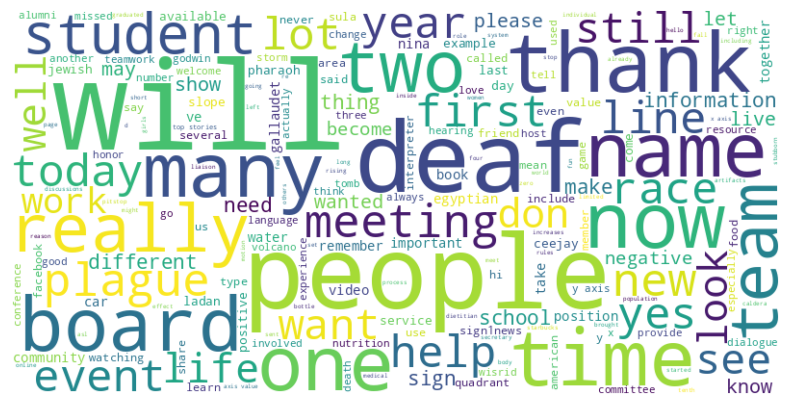

In [ ]:
# Concatenate all cleaned captions into a single string
all_cleaned_captions = ' '.join(filtered_df_with_one_period['Cleaned Caption'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_captions)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Comparing Dictionaries**

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/MIDS Capstone/Data/MSASL/MSASL_train.json'

dfMS = pd.read_json(file_path)

dfMS

,org_text,clean_text,start_time,signer_id,signer,start,end,file,label,height,fps,end_time,url,text,box,width,review
0,match [light-a-MATCH],match,0.000,0,0,0,83,match light-a-MATCH,830,360,30.000,2.767,https://www.youtube.com/watch?v=C37R_Ix8-qs,match,"[0.057544618844985004, 0.21637457609176602, 1....",640,NaN
1,FAIL,fail,0.000,0,-1,0,74,FAIL,542,360,25.000,2.960,https://www.youtube.com/watch?v=PIsUJl8BN_I,fail,"[0.06577941775321901, 0.167171776294708, 0.939...",480,NaN
2,laugh,laugh,0.000,4,26,0,31,SignSchool Laugh with Legs 2,312,360,29.970,1.034,www.youtube.com/watch?v=9FdHlMOnVjg,laugh,"[0.131885945796966, 0.32334136962890603, 1.0, ...",640,NaN
3,BOOK,book,0.000,0,-1,0,66,BOOK(3),38,360,25.000,2.640,https://www.youtube.com/watch?v=J7tP98oDxqE,book,"[0.055698871612548, 0.25173279643058705, 0.996...",480,NaN
4,sign-language,sign language,0.000,0,-1,0,75,SIGN-LANGUAGE-S-CLAW-F,848,360,29.970,2.502,www.youtube.com/watch?v=N2mG9ZKjrGA,sign language,"[0.039043992757797005, 0.24198183417320202, 1....",640,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16049,WRITE,write,539.939,32,17,16182,16301,ASL 1 Unit 1 Vocabulary,53,360,29.970,543.910,https://www.youtube.com/watch?v=fNg_sJ9f8EI,write,"[0.032177031040191005, 0.31613153219223, 1.0, ...",640,NaN
16050,hot,hot,0.000,2,42,0,127,Hot,135,360,29.657,4.282,https://www.youtube.com/watch?v=MkXUHhsMAns,hot,"[0.000367134809494, 0.20649650692939703, 1.0, ...",640,NaN
16051,hi,hi,0.000,0,0,0,47,Hi,379,360,29.970,1.568,www.youtube.com/watch?v=rhfJGeMDMzQ,hi,"[0.013705313205718002, 0.17314371466636602, 1....",640,NaN
16052,Learn,learn,0.000,135,-1,0,104,ASL Learn,22,360,30.000,3.467,https://www.youtube.com/watch?v=n-b2NMAwk28,learn,"[0.18269836902618403, 0.19255371391773202, 1.0...",480,NaN


In [ ]:

# Extract unique words from the 'clean_count' column of 'df'
unique_words_df = set(' '.join(df['Cleaned Caption']).split())

# Extract unique words from the 'clean_text' column of 'dfMS'
unique_words_dfMS = set(dfMS['clean_text'].unique())

# Find words unique to 'df'
unique_words_in_df = unique_words_df.difference(unique_words_dfMS)

# Find words unique to 'dfMS'
unique_words_in_dfMS = unique_words_dfMS.difference(unique_words_df)

# Calculate the counts of unique words in each DataFrame
count_unique_words_in_df = len(unique_words_in_df)
count_unique_words_in_dfMS = len(unique_words_in_dfMS)

# Print the counts
print("Number of unique words in 'df' but not in 'dfMS':", count_unique_words_in_df)
print("Number of unique words in 'dfMS' but not in 'df':", count_unique_words_in_dfMS)

Number of unique words in 'df' but not in 'dfMS': 3998
Number of unique words in 'dfMS' but not in 'df': 469


In [ ]:
len(unique_words_dfMS)

1048

In [ ]:
len(unique_words_df)

4577

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/MIDS Capstone/Data/WLASL/WLASL.txt'

# Initialize an empty list to store words
words_list = []

# Read the file line by line and split each line into words
with open(file_path, 'r') as file:
    for line in file:
        words = line.strip().split()
        words_list.extend(words)

# Create a DataFrame from the list of words
dfWL = pd.DataFrame({'Words': words_list})

# Display the first few rows of the DataFrame
dfWL


,Words
0,0
1,book
2,1
3,drink
4,2
...,...
4043,weigh
4044,1998
4045,wheelchair
4046,1999


In [ ]:
# Use regular expression to filter out rows with numeric characters
dfWL = dfWL[~dfWL['Words'].str.contains(r'\d')]

# Reset the index of the DataFrame
dfWL.reset_index(drop=True, inplace=True)

# Display the DataFrame without rows containing numbers
dfWL

,Words
0,book
1,drink
2,computer
3,before
4,chair
...,...
2043,washington
2044,waterfall
2045,weigh
2046,wheelchair


In [ ]:
# Extract unique words from the 'clean_count' column of 'df'
unique_words_df = set(' '.join(df['Cleaned Caption']).split())

# Extract unique words from the 'Words' column of 'dfWL'
unique_words_dfWL = set(dfWL['Words'])

# Find words unique to 'df'
unique_words_in_df = unique_words_df.difference(unique_words_dfWL)

# Find words unique to 'dfWL'
unique_words_in_dfWL = unique_words_dfWL.difference(unique_words_df)

# Calculate the counts of unique words in each DataFrame
count_unique_words_in_df = len(unique_words_in_df)
count_unique_words_in_dfWL = len(unique_words_in_dfWL)

# Print the counts
print("Number of unique words in 'df' but not in 'dfWL':", count_unique_words_in_df)
print("Number of unique words in 'dfWL' but not in 'df':", count_unique_words_in_dfWL)

Number of unique words in 'df' but not in 'dfWL': 3463
Number of unique words in 'dfWL' but not in 'df': 870


In [ ]:
#Group by hist

# Group by 'File Name' and calculate the sum of 'Caption Length' and 'Clip Duration'
grouped_df = df.groupby('File Name').agg({'Caption Length': 'sum', 'Clip Duration': 'sum'}).reset_index()

# Calculate 'Words per second' by dividing summed caption length by summed clip duration
grouped_df['Words per second'] = grouped_df['Caption Length'] / grouped_df['Clip Duration']



# Display the resulting grouped DataFrame
grouped_df

,File Name,Caption Length,Clip Duration,Words per second
0,-xg8MDaGgyc.ase.vtt,329,85.879,3.830971
1,06kKvQp4SfM.en-0hllRZe4s5s.vtt,199,88.677,2.244099
2,0L6S0b14ZmI.en.vtt,93,56.121,1.657134
3,0XGfpv6PUq4.en.vtt,375,200.560,1.869765
4,0bodeyCThJM.en.vtt,1506,918.126,1.640298
...,...,...,...,...
64,tkuw6SBkZlc.en.vtt,70,106.460,0.657524
65,tpsNU62nTrA.ase.vtt,259,174.440,1.484751
66,ueBlByV3mIA.en.vtt,114,66.920,1.703527
67,wPZ3EJylhNU.en-US.vtt,493,353.052,1.396395


In [ ]:
grouped_df.describe()

,Caption Length,Clip Duration,Words per second
count,69.000000,69.000000,69.000000
mean,409.608696,221.564217,1.868504
std,414.196217,219.886619,0.627660
min,7.000000,2.000000,0.548221
25%,141.000000,82.880000,1.514035
50%,259.000000,149.289000,1.722961
75%,493.000000,256.951000,2.184959
max,1775.000000,927.551000,3.830971


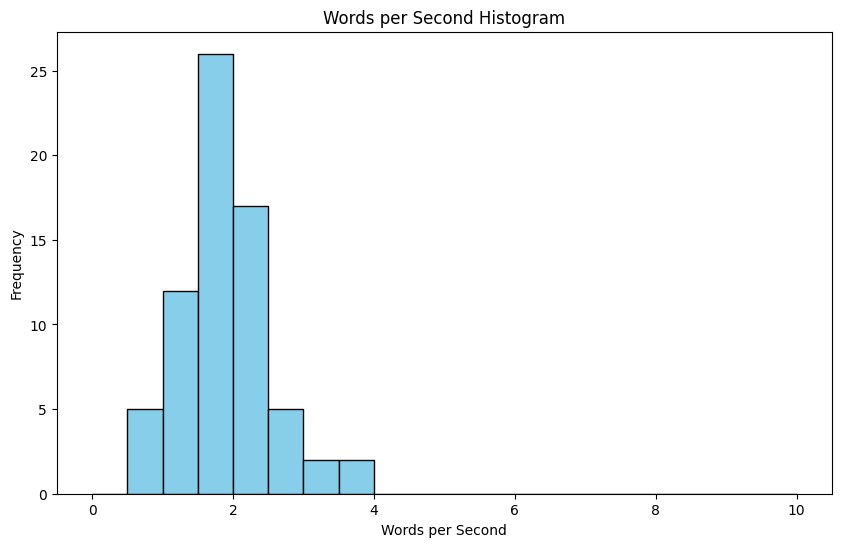

Standard Deviation of Words per Second: 0.6276596772254062
Variance of Words per Second: 0.393956670414701


In [ ]:
# Create a histogram for the 'Words per second' column
plt.figure(figsize=(10, 6))
plt.hist(grouped_df['Words per second'], bins=20, range=(0, 10), color='skyblue', edgecolor='black')
plt.title('Words per Second Histogram')
plt.xlabel('Words per Second')
plt.ylabel('Frequency')
plt.show()

# Print the standard deviation and variance of the 'Words per second' column
std_deviation = grouped_df['Words per second'].std()
variance = grouped_df['Words per second'].var()

print(f'Standard Deviation of Words per Second: {std_deviation}')
print(f'Variance of Words per Second: {variance}')